In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet, set_log_level

In [3]:
data = pd.read_csv('data_NO2.csv', sep=';')
data.drop('volume_demand', axis=1, inplace=True)
data.drop('volume_production', axis=1, inplace=True)

data.rename(columns={'datetime_utc': 'ds'}, inplace=True)
data.rename(columns={'spot_price': 'y'}, inplace=True)
data['ds'] = pd.to_datetime(data['ds'])
data.head()


# Train-test split
data = data.sort_values('ds')
data = data.reset_index(drop=True)
train_df = data.iloc[:-24*150]
test_df = data.iloc[-24*150:]



# NeuralProphet
set_log_level("ERROR")
model = NeuralProphet(

  )
metrics = model.fit(train_df, freq="H")
future = model.make_future_dataframe(train_df, periods=24*150, n_historic_predictions=len(train_df))
forecast = model.predict(future)
model.plot(forecast)
plt.show()




WARNING - (py.warnings._showwarnmsg) - C:\Users\rahim\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\rahim\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showwarnmsg) - C:\Users\rahim\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNI

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/257 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - C:\Users\rahim\AppData\Roaming\Python\Python311\site-packages\pytorch_lightning\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 128. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - C:\Users\rahim\AppData\Roaming\Python\Python311\site-packages\pytorch_lightning\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 98. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - C:\Users\rahim\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\rahim\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showwarnmsg) - C:\Users\rahim\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNI

Predicting: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - C:\Users\rahim\AppData\Roaming\Python\Python311\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



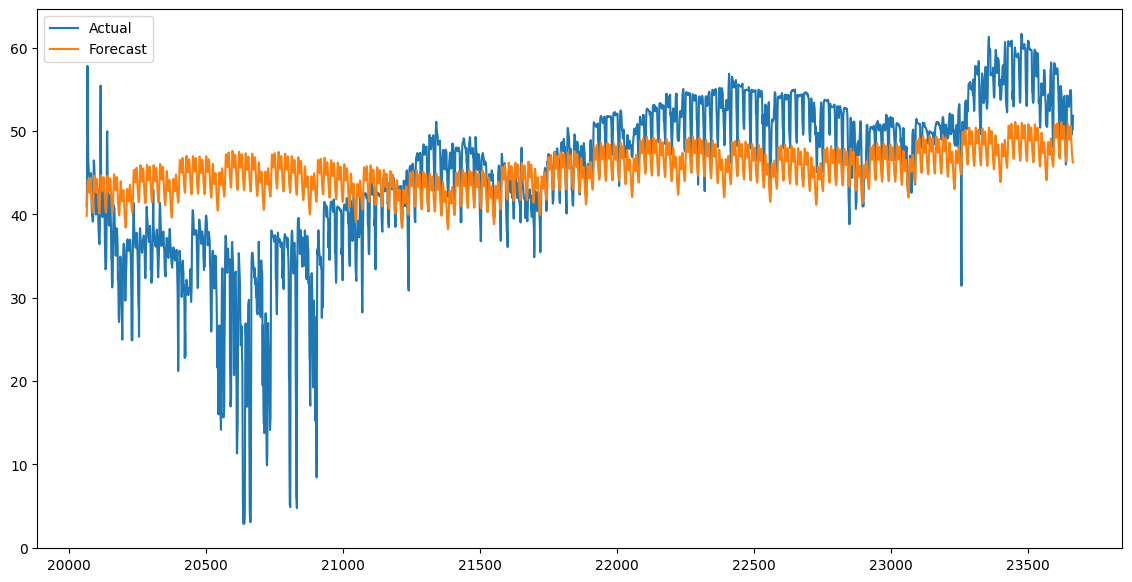

Mean Squared Error: 65.97980493081063
Mean Absolute Error: 6.1125240031348325


In [7]:
# Evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_forecast(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    plt.figure(figsize=(14, 7))
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Forecast')
    plt.legend()
    plt.show()
    return mse, mae


mse, mae = evaluate_forecast(test_df['y'], forecast['yhat1'].iloc[-24*150:])
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

